----
# Entregable 2 - 2020/21
----

# Instrucciones

* Introduce tu nombre y tus apellidos en la siguiente celda (reemplaza los que pone por el tuyo y tu email.
* Renombra el fichero agregando tus apellidos y nombre (en ese orden) al principio para su entrega. Por ejemplo, Martinez_Garcia_Juan_20_21_BIG_DATA_UNAV_Entregable_Parte.
* Lee atentamente las instrucciones de cada bloque completa el examen.

**Nombre:** Ubaldo  
**Apellidos:** Peralta Sánchez  
**Email:** uperaltasan@alumni.unav.es 

# Parte 1

## Ventas de videojuegos

En esta primera parte vamos a estudiar un dataset con ventas de videojuegos.

Tenemos un fichero con datos de ventas de videojuegos con las siguientes columnas:

- Rank : Ranking de la venta del videojuego a nivel mundial
- Name : Nombre del videojuego
- Platform : Plataforma en la que fue lanzado (Wii, PS4, PC...et)
- Year : Año de lanzamiento
- Genero : Genero del videojuego
- Publisher : Empresa que publico el juego
- NA_Sales - Ventas en Norte America (en millones)
- EU_Sales - Ventas en Europa (en millones)
- JP_Sales - Ventas en Japon (en millones)
- Other_Sales - Ventas en el resto del mundo (en millones)
- Global_Sales - Ventas a nivel mundial (en millones)



Cargamos el dataset...

In [6]:
# carga el fichero con las ventas
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

games = pd.read_excel('Final_datos2/vgsales.xlsx')
games.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


## Ventas a nivel y datos global (1 punto)

¿Cuál es el videojuego que ha generado más ingresos a nivel global? (0.25 puntos)  

In [8]:
games[games["Global_Sales"] == games["Global_Sales"].max()]["Name"]

0    Wii Sports
Name: Name, dtype: object

¿Cuál es la plataforma con mayor media de ventas a nivel global? (0.25 puntos)  

In [9]:
games[["Platform","Global_Sales"]].groupby(["Platform"]).mean().sort_values("Global_Sales", ascending = False).head(1)

,Global_Sales
Platform,
GB,2.606633


¿Cuál es la empresa que más dinero ha ganado con la venta de videojuegos? (0.25 puntos)  

In [10]:
games[["Publisher","Global_Sales"]].groupby(["Publisher"]).sum().sort_values("Global_Sales", ascending = False).head(1)

,Global_Sales
Publisher,
Nintendo,1786.56


¿Los videojuegos de qué año son los que más dinero han recaudado ? (0.25 puntos)  

In [11]:
games[["Year","Global_Sales"]].groupby(["Year"]).sum().sort_values("Global_Sales", ascending = False).head(1)

,Global_Sales
Year,
2008.0,678.9


## Calculando algunas datos interesantes (1 punto)

Calcula cual es el videojuego que se vendió más en cada una de las plataformas (0.5 puntos)

In [12]:
games[["Name","Platform","Global_Sales"]].groupby(["Platform","Name"]).sum().sort_values("Global_Sales",
ascending = False).groupby("Platform").head(1)


,,Global_Sales
Platform,Name,
Wii,Wii Sports,82.74
NES,Super Mario Bros.,40.24
GB,Pokemon Red/Pokemon Blue,31.37
DS,New Super Mario Bros.,30.01
X360,Kinect Adventures!,21.82
PS3,Grand Theft Auto V,21.40
PS2,Grand Theft Auto: San Andreas,20.81
SNES,Super Mario World,20.61
GBA,Pokemon Ruby/Pokemon Sapphire,15.85


Calcula cual es el videojuego que más se vendió para cada genero (0.5 puntos)

In [13]:
games[["Name","Genre","Global_Sales"]].groupby(["Genre","Name"]).sum().sort_values("Global_Sales",
ascending = False).groupby("Genre").head(1)

,,Global_Sales
Genre,Name,
Sports,Wii Sports,82.74
Action,Grand Theft Auto V,55.92
Platform,Super Mario Bros.,45.31
Puzzle,Tetris,35.84
Racing,Mario Kart Wii,35.82
Role-Playing,Pokemon Red/Pokemon Blue,31.37
Shooter,Call of Duty: Black Ops,31.03
Misc,Wii Play,29.02
Simulation,Nintendogs,24.76


## Evolución de las ventas a través de las décadas (1 punto)

Se quiere realizar un estudio de la evolución de las ventas medias de los videojuegos por décadas (los 80s, 90s, los 00s y los 01s). Las décadas se dividen como sigue:

Década 80s --> 1980 - 1989  
Década 90s --> 1990 - 1999  
Década 00s --> 2000 - 2009  
Década 10s --> 2010 - 2017  

Todos aquellos valores que no estén dentro de esas décadas pueden etiquetarse como 'Others'.

Genera una función que categorice las fechas por décadas (0.5 puntos) y extrae cómo ha evolucionado la facturacion global los videojuegos a lo largo de las diferentes décadas (0.5 puntos). 

In [15]:
def categorize_decade(df, year_col, final_col):
    """Categorize the decade of all values in a column
    
    Parameters
    ----------
    df : dataframe
        the dataframe we want to categorize
    year_col: str
        the column that contains the years
    final_col: str
        a name for the new column that contains the decade
    """
    df.loc[(games[year_col] < 1980) | (games[year_col] > 2017), final_col] = "Others"
    df.loc[(games[year_col] >= 1980) & (games[year_col] <= 1989), final_col] = "1.Década 80s"
    df.loc[(games[year_col] >= 1990) & (games[year_col] <= 1999), final_col] = "2.Década 90s"
    df.loc[(games[year_col] >= 2000) & (games[year_col] <= 2009), final_col] = "3.Década 00s"
    df.loc[(games[year_col] >= 2010) & (games[year_col] <= 2017), final_col] = "4.Década 10s"


categorize_decade(games, "Year", "Decade")
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,3.Década 00s
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1.Década 80s
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.Década 00s
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.Década 00s
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,2.Década 90s


              Global_Sales
Decade                    
1.Década 80s        376.58
2.Década 90s       1278.91
3.Década 00s       4644.02
4.Década 10s       2520.56
Others                0.29


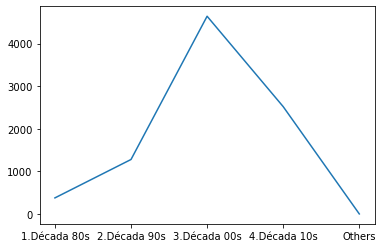

In [20]:
decade_sales = games[["Decade", "Global_Sales"]].groupby("Decade").sum()

print(decade_sales)
plt.plot(decade_sales)

# Parte 2

## 5000 películas de IMD (The Internet Movie Database)

En este proyecto nos enfocaremos en el análisis exploratorio de datos de un dataset de 5000 películas obtenidas de la base de datos de [Internet Movie Database](https://www.imdb.com).

El objetivo de este ejercicio es poner en práctica varias de las técnicas vistas en Pandas a lo largo de la parte 2 del curso y ver cómo obtener métricas interesantes con este dataset. Hay que tener en cuenta que es un dataset que tiene información que puede ser incorrecta, incompleta, o directamente errónea, pero esto nos acerca a lo que se enfrenta de forma muy habitual un Data Scientist.


## Obtención de los datos

Este dataset lo podemos obtener de la página de [Kaggle directamente](https://www.kaggle.com/tmdb/tmdb-movie-metadata/downloads/tmdb_5000_movies.csv) o accediendo al fichero que se encuentra en el mismo lugar que este notebook.

Primero, debemos comenzar con los import apropiados, que ya hemos visto muchas veces.

Nota: Hemos usado el fichero original de IMDB pero por temas de Copyright deberíamos usar el de [TMDB](https://www.themoviedb.org/?language=es). Para el ámbito de este ejercicio no ocurre nada por hacerlo, pero en una aplicación real deberíamos usar el fichero de TMDB y no el de IMDB.

### Los imports

Aqui están:

In [49]:
import pandas as pd
import numpy as np
import datetime

### Explorando los datos

Vamos a cargar el dataset de películas y obtener primero una descripción general del mismo. Carguemos el dataset primero.


In [54]:
df = pd.read_csv('Final_datos2/movie_metadata.csv')
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Muestra el tipo de columnas y el head del dataset

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [138]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Rentabilidad por director y año (1 puntos)

**Obtén las diferencias entre el presupuesto de las películas y los ingresos en taquilla, la columna `gross`, añadiendo una nueva columna que se llame `diff_gross`. Muestra la diferencia entre presupuesto y total de taquilla por director de forma anual. El primer paso será limpiar los datos, ya que es posible que no todos las filas de la nueva columna tengan datos. Elimina aquéllas filas que contengan datos vacíos (missing values). Crea otro dataframe para no sobreescribir el original.**

In [55]:
films = df.dropna().copy()
films["diff_gross"] = films["gross"] - films["budget"]
films[["director_name","title_year","diff_gross", ]].groupby(["director_name",
        "title_year"]).sum().sort_values(["director_name", "title_year"], ascending = True)

,,diff_gross
director_name,title_year,
Aaron Schneider,2009.0,1676553.0
Aaron Seltzer,2006.0,28546578.0
Abel Ferrara,1996.0,-11272676.0
Adam Goldberg,2003.0,-1647420.0
Adam Marcus,1993.0,13435068.0
...,...,...
Zack Snyder,2016.0,80249062.0
Zak Penn,2004.0,-1363170.0
Zal Batmanglij,2013.0,-4231704.0


**Agrupa el dataframe por director de película y realiza la suma de total la columna `diff_gross`, luego ordénalo de forma descendente**

In [4]:
films[["director_name", "diff_gross"]].groupby("director_name").sum().sort_values("diff_gross", ascending = False)

,diff_gross
director_name,
Steven Spielberg,2.486332e+09
George Lucas,1.386641e+09
James Cameron,1.199626e+09
Joss Whedon,1.000887e+09
Chris Columbus,9.417076e+08
...,...
Hayao Miyazaki,-2.444860e+09
Lajos Koltai,-2.499804e+09
Katsuhiro Ôtomo,-3.226670e+09


## Directores y críticas (0.5 puntos)

**Vamos a realizar un estudio de los mejores directores en base a las mejores reviews obtenidas.**

**Utilizando el dataframe sin valores nulos, agrupa usando la función `group_by` los directores que han obtenido mayor número de críticas (entendiendo que a mayor el número, mejores son las críticas). Pista: Usa la columna `num_critic_for_reviews` para esto.**


In [5]:
films[["director_name","num_critic_for_reviews"]].groupby(
    "director_name").sum().sort_values("num_critic_for_reviews", ascending = False)

,num_critic_for_reviews
director_name,
Steven Spielberg,6526.0
Ridley Scott,4930.0
Tim Burton,4200.0
Clint Eastwood,4172.0
Christopher Nolan,4090.0
...,...
Joe Camp,5.0
Sterling Van Wagenen,4.0
Franklin J. Schaffner,2.0


## Ratio de críticas (1 puntos)

**IMDB es conocido por la desproporción a veces entre la valoración de los críticos profesionales y la de los usuarios de la plataforma; valores altos significan que la crítica profesional valora más la película y viceversa. Obtén este ratio y añádelo en una nueva columna llamada `critic_ratio`. Utiliza como fuente el dataframe sin datos vacíos**

In [6]:
films["critic_ratio"] = films["num_critic_for_reviews"] / films["num_user_for_reviews"]
films.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross,critic_ratio
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,0.236739
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,0.243942
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,0.605634
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,0.301000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,0.626016


**Obtén el listado de directores con la media del ratio de críticas. Como siempre, crea un nuevo dataframe y con éste crea un índice. Obtén aquellos con un mayor ratio solamente, los 20 primeros**

In [7]:
films[["director_name","critic_ratio"]].groupby("director_name")["critic_ratio"].mean()

director_name
Aaron Schneider       1.649485
Aaron Seltzer         0.161501
Abel Ferrara          1.000000
Adam Goldberg         0.550000
Adam Marcus           0.353312
                        ...   
Zack Snyder           0.411600
Zak Penn              0.952381
Zal Batmanglij        1.680672
Álex de la Iglesia    0.755319
Émile Gaudreault      1.000000
Name: critic_ratio, Length: 1659, dtype: float64

## Películas por género (1 puntos)

**Vamos a ver cuantas películas se han realizado por género. Ten en cuenta que una misma película puede pertener a varios géneros a la vez. Además si te fijas en la columna `genres` del dataframe sin valores vacíos, verás que tiene los géneros separados por el simbolo "|". Debemos por lo tanto que crear una función que traduzca ese campo a una lista de géneros.**

**Añade una nueva columna que se llame `genre_list` que sea el resultado de convertir la columna `genres` a una lista de géneros**

In [60]:
films["genre_list"] = films["genres"].str.split("|")
films["genre_list"]

0            [Action, Adventure, Fantasy, Sci-Fi]
1                    [Action, Adventure, Fantasy]
2                   [Action, Adventure, Thriller]
3                              [Action, Thriller]
5                     [Action, Adventure, Sci-Fi]
                          ...                    
5026                      [Drama, Music, Romance]
5027                                      [Drama]
5033                    [Drama, Sci-Fi, Thriller]
5035    [Action, Crime, Drama, Romance, Thriller]
5042                                [Documentary]
Name: genre_list, Length: 3756, dtype: object

**Una vez hecho ésto debes obtener la lista de todos los géneros, recorriendo el dataframe anterior y obteniéndolos de la columna `genre_list`.**

**Pista 1: Deberás resetear el index con el [método](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) `reset_index`**

**Pista 2: Crea una lista que tenga todas las listas dentro de cada fila del dataset.**

**Pista 3: Una vez tengas la lista con todos los generos de cada película, evidentemente hay muchas repeticiones. Usa la clase [Counter](https://pymotw.com/2/collections/counter.html) del módulo *collections* para crear un diccionario que tiene como claves los nómbres de los géneros y como valor el número de veces que aparecía en este lista**

**Pista 4: Una vez tengas el diccionario, puedes utilizar el [metodo de numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html) `asarray` para convertir las claves y los valores de ese diccionario a arrays numpy.**

In [67]:
from collections import Counter

list_of_genre = list(films["genre_list"])

# Generating a dict using Counter()
c = Counter()
for line in list_of_genre:
    for pos in line:
        c[pos] += 1
        
# Converting the dict into a numpy array
n_genre_films = np.asarray(list(c.items()))

for genre in n_genre_films:
    print("Numero de peliculas de " + genre[0] + ": " + genre[1])


Numero de peliculas de Action: 959
Numero de peliculas de Adventure: 781
Numero de peliculas de Fantasy: 507
Numero de peliculas de Sci-Fi: 496
Numero de peliculas de Thriller: 1117
Numero de peliculas de Romance: 859
Numero de peliculas de Animation: 196
Numero de peliculas de Comedy: 1461
Numero de peliculas de Family: 442
Numero de peliculas de Musical: 96
Numero de peliculas de Mystery: 384
Numero de peliculas de Western: 59
Numero de peliculas de Drama: 1893
Numero de peliculas de History: 149
Numero de peliculas de Sport: 148
Numero de peliculas de Crime: 709
Numero de peliculas de Horror: 392
Numero de peliculas de War: 152
Numero de peliculas de Biography: 239
Numero de peliculas de Music: 151
Numero de peliculas de Documentary: 45
Numero de peliculas de Film-Noir: 1


# Parte 3

## Evolución del COVID-19 durante la primera ola

En consonancia con la situación actual, en esta tercera parte os proponemos que exploréis un dataset asociado al COVID-19.

La enfermedad por coronavirus 2019 (COVID-19) es una enfermedad infecciosa causada por el coronavirus 2 del síndrome respiratorio agudo severo (SARS-CoV-2). Se identificó por primera vez en 2019 en Wuhan, China, y desde entonces se ha propagado a nivel mundial, lo que ha resultado en la pandemia de coronavirus 2019-20. Los síntomas comunes incluyen fiebre, tos y dificultad para respirar. El dolor muscular, la producción de esputo y el dolor de garganta son menos comunes. La tasa de muertes por número de casos diagnosticados es, en promedio, del 3,4%, oscilando entre el 0,2% en los menores de 20 años y aproximadamente el 15% en los mayores de 80 años.

Los datos que vamos a explorar provienenen del dataset disponible en: https://github.com/datadista/datasets/tree/master/COVID%2019 que contiene información sobre la situación diaria acumulada de la enfermedad por el coronavirus SARS-CoV-2 (COVID-19) en España en un formato accesible y reutilizable. 

En nuestro caso vamos a estudiar el fichero [ccaa_covid19_datos_isciii.csv](https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_isciii.csv), que contiene datos a nivel de casos registrados por Comunidad Autónoma y que podéis descargar desde el apartado del 2º entregable en ADI.

| Campo	        | Descripción	        | Formato  | Ejemplo |
| :-------------|:-------------------------------------------------------------------|----------|:-----------:|
| fecha	        | Fecha de notificación	| YYYY-MM-DD	| 2020-03-20|
| cod_ine	    | Código INE de CCAA	| Texto	   | 11|
| CCAA	        | Comunidad autónoma	| Texto	   | Madrid|
| Caso	        | Casos confirmados acumulados (NaN si no hay casos)	| Número |	7|
| Hospitalizados| Casos acumulados que han precisado hospitalización (incluyen UCI)|	Número	|7|
| UCI	        | Casos acumulados que han precisado ingreso en UCI|	Número|	7|
| Fallecidos	| Personas fallecidas acumuladas	|Número	|7|
| Recuperados	| Personas curadas acumuladas	|Número|7|


**Escribe un programa de Python para mostrar las primeras 5 filas del conjunto de datos COVID-19. Imprime también as 5 últimas filas del conjunto, la información del conjunto de datos  y estima cuántos valores ausentes (NaN) hay en cada columna y sustitúyelos por 0's (0.5 puntos)**.

In [69]:
import pandas as pd
covid_data= pd.read_csv('Final_datos2/ccaa_covid19_datos_isciii.csv')
print(covid_data.head(5))
print(covid_data.tail(5))

        Fecha  cod_ine       CCAA  Casos  Hospitalizados  UCI  Fallecidos  \
0  2020-02-20        1  Andalucía    NaN             NaN  NaN         NaN   
1  2020-02-20        2     Aragón    NaN             NaN  NaN         NaN   
2  2020-02-20        3   Asturias    NaN             NaN  NaN         NaN   
3  2020-02-20        4   Baleares    1.0             NaN  NaN         NaN   
4  2020-02-20        5   Canarias    1.0             NaN  NaN         NaN   

   Recuperados  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
          Fecha  cod_ine        CCAA   Casos  Hospitalizados    UCI  \
888  2020-04-06       19     Melilla    92.0            40.0    3.0   
889  2020-04-06       14      Murcia  1283.0           500.0   84.0   
890  2020-04-06       15     Navarra  3355.0          1488.0  124.0   
891  2020-04-06       16  País Vasco  9021.0          4856.0  417.0   
892  2020-04-06       17    La Rioja  2846.0           918.0   66.0   

     Fal

In [75]:
print("Recuento de NaN en la columna Fecha = " + str(covid_data["Fecha"].isna().sum()))
print("Recuento de NaN en la columna cod_ine = " + str(covid_data["cod_ine"].isna().sum()))
print("Recuento de NaN en la columna CCAA = " + str(covid_data["CCAA"].isna().sum()))
print("Recuento de NaN en la columna Casos = " + str(covid_data["Casos"].isna().sum()))
print("Recuento de NaN en la columna Hospitalizados = " + str(covid_data["Hospitalizados"].isna().sum()))
print("Recuento de NaN en la columna UCI = " + str(covid_data["UCI"].isna().sum()))
print("Recuento de NaN en la columna Fallecidos = " + str(covid_data["Fallecidos"].isna().sum()))
print("Recuento de NaN en la columna Recuperados = " + str(covid_data["Recuperados"].isna().sum()))

Recuento de NaN en la columna Fecha = 0
Recuento de NaN en la columna cod_ine = 0
Recuento de NaN en la columna CCAA = 0
Recuento de NaN en la columna Casos = 141
Recuento de NaN en la columna Hospitalizados = 361
Recuento de NaN en la columna UCI = 323
Recuento de NaN en la columna Fallecidos = 323
Recuento de NaN en la columna Recuperados = 344


In [70]:
covid_data.fillna(0, inplace = True)
covid_data

,Fecha,cod_ine,CCAA,Casos,Hospitalizados,UCI,Fallecidos,Recuperados
0,2020-02-20,1,Andalucía,0.0,0.0,0.0,0.0,0.0
1,2020-02-20,2,Aragón,0.0,0.0,0.0,0.0,0.0
2,2020-02-20,3,Asturias,0.0,0.0,0.0,0.0,0.0
3,2020-02-20,4,Baleares,1.0,0.0,0.0,0.0,0.0
4,2020-02-20,5,Canarias,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
888,2020-04-06,19,Melilla,92.0,40.0,3.0,2.0,11.0
889,2020-04-06,14,Murcia,1283.0,500.0,84.0,78.0,193.0
890,2020-04-06,15,Navarra,3355.0,1488.0,124.0,202.0,421.0
891,2020-04-06,16,País Vasco,9021.0,4856.0,417.0,586.0,3728.0


**Escribe un programa de Python para obtener el número total de casos confirmados, hospitalizados, trasladados a la UCI, fallecidos y recuperados. Antes asegúrate de cargar de nuevo los datos importando el campo de las fechas como *datetime* y sustituyendo los valores *NaN* por *0's* . Convierte los valores numéricos a *int*. Luego crea un nuevo dataframe con la información del último día  y computa el total acumulando todos los valores de todas las CCAA en esa fecha (0.5 puntos).**

In [99]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha           893 non-null    object 
 1   cod_ine         893 non-null    int64  
 2   CCAA            893 non-null    object 
 3   Casos           893 non-null    float64
 4   Hospitalizados  893 non-null    float64
 5   UCI             893 non-null    float64
 6   Fallecidos      893 non-null    float64
 7   Recuperados     893 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 55.9+ KB


In [100]:
covid_data["Fecha"] = pd.to_datetime(covid_data["Fecha"])


In [73]:
covid_data["Casos"] = pd.to_numeric(covid_data["Casos"])
covid_data["Hospitalizados"] = pd.to_numeric(covid_data["Hospitalizados"])
covid_data["UCI"] = pd.to_numeric(covid_data["UCI"])
covid_data["Fallecidos"] = pd.to_numeric(covid_data["Fallecidos"])
covid_data["Recuperados"] = pd.to_numeric(covid_data["Recuperados"])

In [74]:
covid_last_day = covid_data[covid_data["Fecha"] == covid_data["Fecha"].max()]
covid_last_day.sum()

Fecha             2020-04-062020-04-062020-04-062020-04-062020-0...
cod_ine                                                         190
CCAA              AndalucíaAragónAsturiasBalearesCanariasCantabr...
Casos                                                        140510
Hospitalizados                                                63093
UCI                                                            7069
Fallecidos                                                    13798
Recuperados                                                   43208
dtype: object

**Estima ahora la última cifra de casos confirmados, fallecidos y recuperados por CCAA. Para ello, asigna la columna *CCAA* como índice (hazlo *inplace*) y muestra los datos ordenados según número de casos, número de fallecidos y número de recuperados (0.5 puntos)**

In [77]:
covid_last_day.set_index("CCAA", inplace = True)

In [76]:
covid_last_day.groupby("CCAA").sum().sort_values(["Casos","Fallecidos","Recuperados"])

,cod_ine,Casos,Hospitalizados,UCI,Fallecidos,Recuperados
CCAA,,,,,,
Ceuta,18,83.0,9.0,4.0,4.0,2.0
Melilla,19,92.0,40.0,3.0,2.0,11.0
Murcia,14,1283.0,500.0,84.0,78.0,193.0
Baleares,4,1369.0,705.0,124.0,84.0,537.0
Cantabria,6,1501.0,677.0,66.0,85.0,129.0
Asturias,3,1679.0,889.0,91.0,96.0,244.0
Canarias,5,1725.0,689.0,137.0,89.0,186.0
Extremadura,11,2116.0,686.0,70.0,258.0,282.0
La Rioja,17,2846.0,918.0,66.0,160.0,994.0


**¿Cual es la última cifra de casos confirmados, hospitalizados, trasladados a la UCI, fallecidos y recuperados de COVID-19 en Navarra?. ¿Y el número de casos activos (i.e.: Casos - (Fallecidos + Recuperados))? (0.5 puntos).**

In [80]:
covid_last_day.loc[["Navarra"]][["Casos","Hospitalizados","UCI","Fallecidos","Recuperados", "Fecha"]]

,Casos,Hospitalizados,UCI,Fallecidos,Recuperados,Fecha
CCAA,,,,,,
Navarra,3355.0,1488.0,124.0,202.0,421.0,2020-04-06


In [82]:
covid_last_day.loc["Navarra"]["Casos"] - (
    covid_last_day.loc["Navarra"]["Fallecidos"] + covid_last_day.loc["Navarra"]["Recuperados"])

2732.0

**Añade una columna de casos activos al dataframe *original* con los casos activos (*Activos*) en cada momento. Para ello, recuerda  cargar de nuevo el fichero, considerar las fechas como *datetime*, sustituir los *NaN's* por *0's* y convertir los valores numéricos a *int*. Luego puedes añadir la nueva columna *Activos*. (0.5 punto)**

In [130]:
covid_data["Activos"] = covid_data["Casos"] - (
    covid_data["Fallecidos"] + covid_data["Recuperados"])
covid_data

,Fecha,cod_ine,CCAA,Casos,Hospitalizados,UCI,Fallecidos,Recuperados,Activos
0,2020-02-20,1,Andalucía,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-20,2,Aragón,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-20,3,Asturias,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-20,4,Baleares,1.0,0.0,0.0,0.0,0.0,1.0
4,2020-02-20,5,Canarias,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
888,2020-04-06,19,Melilla,92.0,40.0,3.0,2.0,11.0,79.0
889,2020-04-06,14,Murcia,1283.0,500.0,84.0,78.0,193.0,1012.0
890,2020-04-06,15,Navarra,3355.0,1488.0,124.0,202.0,421.0,2732.0
891,2020-04-06,16,País Vasco,9021.0,4856.0,417.0,586.0,3728.0,4707.0


**¿Qué día se produjeron los primeros casos por COVID-19 en España?. ¿Y los primeros fallecimientos (0.5 puntos)?**

In [83]:
more_cero_cases = covid_data["Casos"] > 0
first_date_cases = covid_data["Fecha"] == covid_data[more_cero_cases]["Fecha"].min()

print("Los primeros casos fueron")
covid_data[first_date_cases & more_cero_cases][["Fecha", "CCAA", "Casos"]]

Los primeros casos fueron


,Fecha,CCAA,Casos
3,2020-02-20,Baleares,1.0
4,2020-02-20,Canarias,1.0


In [90]:


more_cero_deads = covid_data["Fallecidos"] > 0
first_date_deads = covid_data["Fecha"] == covid_data[more_cero_deads]["Fecha"].min()

print("Los primeros fallecimientos fueron")
covid_data[first_date_deads & more_cero_deads][["Fecha", "CCAA", "Fallecidos"]]

Los primeros fallecimientos fueron


,Fecha,CCAA,Fallecidos
324,2020-03-08,Aragón,3.0
331,2020-03-08,Cataluña,2.0
333,2020-03-08,C. Valenciana,1.0
336,2020-03-08,Madrid,16.0
340,2020-03-08,País Vasco,6.0


**Escribe un programa de Python que devuelva la fecha en que se detectó el primer fallecido de COVID-19 en cada CCAA . Muéstralos de forma ordenada en función de la fecha (0.5 puntos)**

In [95]:
more_cero_deads = covid_data["Fallecidos"] > 0
covid_data[more_cero_deads][["Fecha", "CCAA", "Fallecidos"]].groupby("CCAA").min().sort_values("Fecha", ascending = True)

,Fecha,Fallecidos
CCAA,,
Cataluña,2020-03-08,2.0
Madrid,2020-03-08,16.0
C. Valenciana,2020-03-08,1.0
País Vasco,2020-03-08,6.0
Aragón,2020-03-08,3.0
La Rioja,2020-03-09,1.0
Extremadura,2020-03-10,1.0
Asturias,2020-03-11,1.0
Castilla La Mancha,2020-03-11,1.0


## ¡¡Buen trabajo!!